In [ ]:
#import dataset
! wget https://github.com/RafiIndra/Dry-beans-dataset/raw/main/Dry_Bean_Dataset.xlsx

--2022-06-03 14:55:14--  https://github.com/RafiIndra/Dry-beans-dataset/raw/main/Dry_Bean_Dataset.xlsx
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/RafiIndra/Dry-beans-dataset/main/Dry_Bean_Dataset.xlsx [following]
--2022-06-03 14:55:15--  https://raw.githubusercontent.com/RafiIndra/Dry-beans-dataset/main/Dry_Bean_Dataset.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3043104 (2.9M) [application/octet-stream]
Saving to: ‘Dry_Bean_Dataset.xlsx’

Dry_Bean_Dataset.xl 100%[===================>]   2.90M  --.-KB/s    in 0.07s   

2022-06-03 14:55:15 (43.9 MB/s) - ‘Dry_Bean_Dataset.xlsx’ saved

In [ ]:
#membaca dataset
import pandas as pd
dataframe  = pd.read_excel('Dry_Bean_Dataset.xlsx')
dataframe

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [ ]:
#melakukan pemeriksaan data kosong
print(dataframe.isna().values.any())
print(dataframe.isnull().values.any())

False
False


In [ ]:
Q1 = (dataframe[['Area',	'Perimeter',	'MajorAxisLength',	'MinorAxisLength',	'AspectRation',	'Eccentricity',	'ConvexArea',
                 'EquivDiameter', 'Extent', 'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
                  'ShapeFactor3',  'ShapeFactor4']]).quantile(0.25)
Q3 = (dataframe[['Area',	'Perimeter',	'MajorAxisLength',	'MinorAxisLength',	'AspectRation',	'Eccentricity',	'ConvexArea',
                 'EquivDiameter', 'Extent', 'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
                  'ShapeFactor3',  'ShapeFactor4']]).quantile(0.75)
IQR = Q3 - Q1
maximum = Q3 + (1.5*IQR)
minimum = Q1 - (1.5*IQR)
more_than = (dataframe > maximum)
lower_than = (dataframe < minimum)
data_imputasi = dataframe.mask(more_than, maximum, axis=1)
data_imputasi = dataframe.mask(lower_than, minimum, axis=1)
#print('\nPersebaran data setelah ditangani Outlier: ')
#print(data_imputasi[['pm10',	'pm25',	'so2',	'co',	'o3',	'no2',	'max']].describe())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
#deklarasi fungsi untuk cek rentang data
def cetak_rentang(df):
  list_fitur = df.columns[:-1]
  for i in list_fitur:
    max = df[i].max()
    min = df[i].min()
    print('range fitur', i, ': ', max-min)

#deklarasi fungsi untuk normalisasi min-max
def MinMax(df):
  df = df.copy()
  list_fitur = df.columns[:-1]
  for i in list_fitur:
    max = df[i].max()
    min = df[i].min()
    df[i] = (df[i]-min) / (max-min)
  return df

In [ ]:
#range data sebelum dilakukan normalisasi:
cetak_rentang(dataframe)

range fitur Area :  234196
range fitur Perimeter :  1460.634
range fitur MajorAxisLength :  555.258988478042
range fitur MinorAxisLength :  337.6858433770959
range fitur AspectRation :  1.405438850769858
range fitur Eccentricity :  0.6924717051144402
range fitur ConvexArea :  242577
range fitur EquivDiameter :  408.1305940974207
range fitur Extent :  0.3108799237536567
range fitur Solidity :  0.07543134285998654
range fitur roundness :  0.5010671433748175
range fitur Compactness :  0.34672621040093843
range fitur ShapeFactor1 :  0.007673156655993104
range fitur ShapeFactor2 :  0.0031008029464183904
range fitur ShapeFactor3 :  0.5644285692009288
range fitur ShapeFactor4 :  0.05204512733727651


In [ ]:
#range data setelah dilakukan normalisasi
dataframe = MinMax(dataframe)
cetak_rentang(dataframe)

range fitur Area :  1.0
range fitur Perimeter :  1.0
range fitur MajorAxisLength :  1.0
range fitur MinorAxisLength :  1.0
range fitur AspectRation :  1.0
range fitur Eccentricity :  1.0
range fitur ConvexArea :  1.0
range fitur EquivDiameter :  1.0
range fitur Extent :  1.0
range fitur Solidity :  1.0
range fitur roundness :  1.0
range fitur Compactness :  1.0
range fitur ShapeFactor1 :  1.0
range fitur ShapeFactor2 :  1.0
range fitur ShapeFactor3 :  1.0
range fitur ShapeFactor4 :  1.0


In [ ]:
#membuat data latih dan data uji dengan perbandingan 70:30
from sklearn.model_selection import train_test_split
data_latih, data_uji = train_test_split(dataframe, random_state=1, test_size=0.3)

In [ ]:
#menyimpan kelas dari data uji dan data latih
label_latih = data_latih.pop('Class')
label_uji = data_uji.pop('Class')

In [ ]:
#melakukan klasifikasi KNN dengan k=15
from sklearn.neighbors import KNeighborsClassifier as knn
KNN = knn(n_neighbors=15)
model_KNN = KNN.fit(data_latih, label_latih)
kelas = model_KNN.predict(data_uji)
print("hasil benar: ", sum(kelas==label_uji), " dari", len(data_uji), " data")
print("persentase benar: %.4f" % (sum(kelas==label_uji) / len(data_uji) * 100), "%")

hasil benar:  3782  dari 4084  data
persentase benar: 92.6053 %


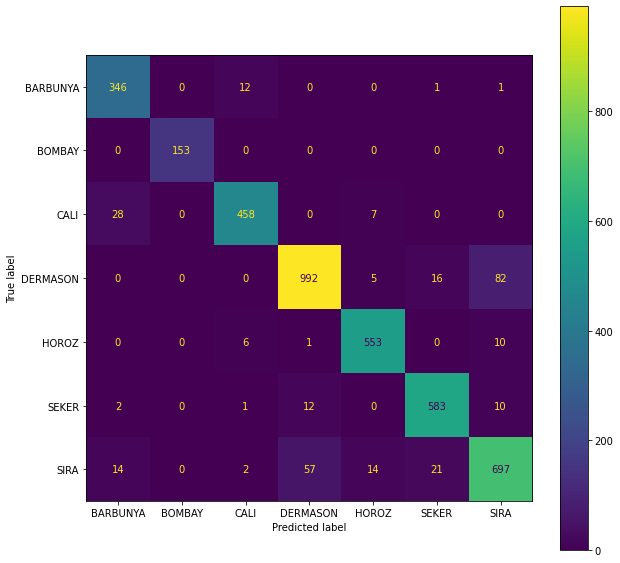

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
confusion_matrix = confusion_matrix(kelas, label_uji)
fig, ax = plt.subplots(figsize=(10, 10))
ConfusionMatrixDisplay.from_predictions(kelas, label_uji,ax=ax)
plt.show()

Maximum Akurasi Benar: 0.9260528893241919 Pada Nilai K = 14


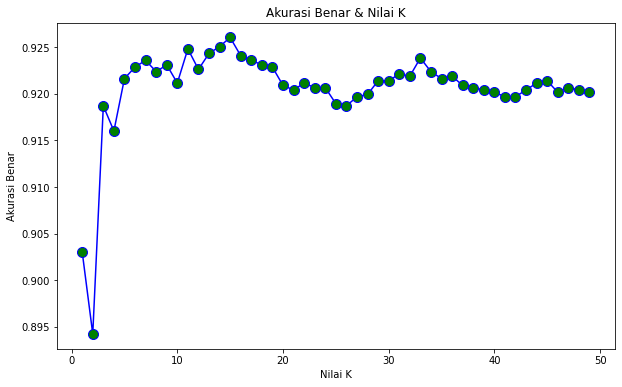

In [ ]:
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
%matplotlib inline
Akurasi = []
from sklearn import metrics
for i in range(1,50):
    neigh = knn(n_neighbors=i).fit(data_latih,label_latih)
    yhat = neigh.predict(data_uji)
    Akurasi.append(metrics.accuracy_score(label_uji, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,50),Akurasi,color = 'blue',linestyle='solid', 
         marker='o',markerfacecolor='green', markersize=10)
plt.title('Akurasi Benar & Nilai K')
plt.xlabel('Nilai K')
plt.ylabel('Akurasi Benar')
print("Maximum Akurasi Benar:",max(Akurasi),"Pada Nilai K =",Akurasi.index(max(Akurasi)))